In [7]:
dir="981762.txt"
lines = open(dir, encoding='utf-8').read().strip().split('\n')
#行分割并标准化
pairs = [[s for s in l.split('#')] for l in lines]
numpair=[]     # 用来记录每天的轨迹
attr=[]        # 用来记录每天的属性
traj_day_len=[]# 用来用来记录每天的轨迹长度
label=[]
for week_rank in range(len(pairs)):
    label+=[pairs[week_rank][7].split(',')]
    for day in range(7):
        numpair+=[pairs[week_rank][day].split('Attr')[0].split(',')[:-1]]
        traj_day_len.append(len(pairs[week_rank][day].split('Attr')[0].split(',')[:-1]))
        attr.append([[pairs[week_rank][day].split('Attr')[1].split(',')[1:]]])
print(len(numpair))
print(len(traj_day_len))
print(len(attr))
print(len(label))
# 先不用合并了，就先出个每天的吧
# for i,j in enumerate(numpair):
#     numpairs[i//7].extend

11445
11445
11445
1635


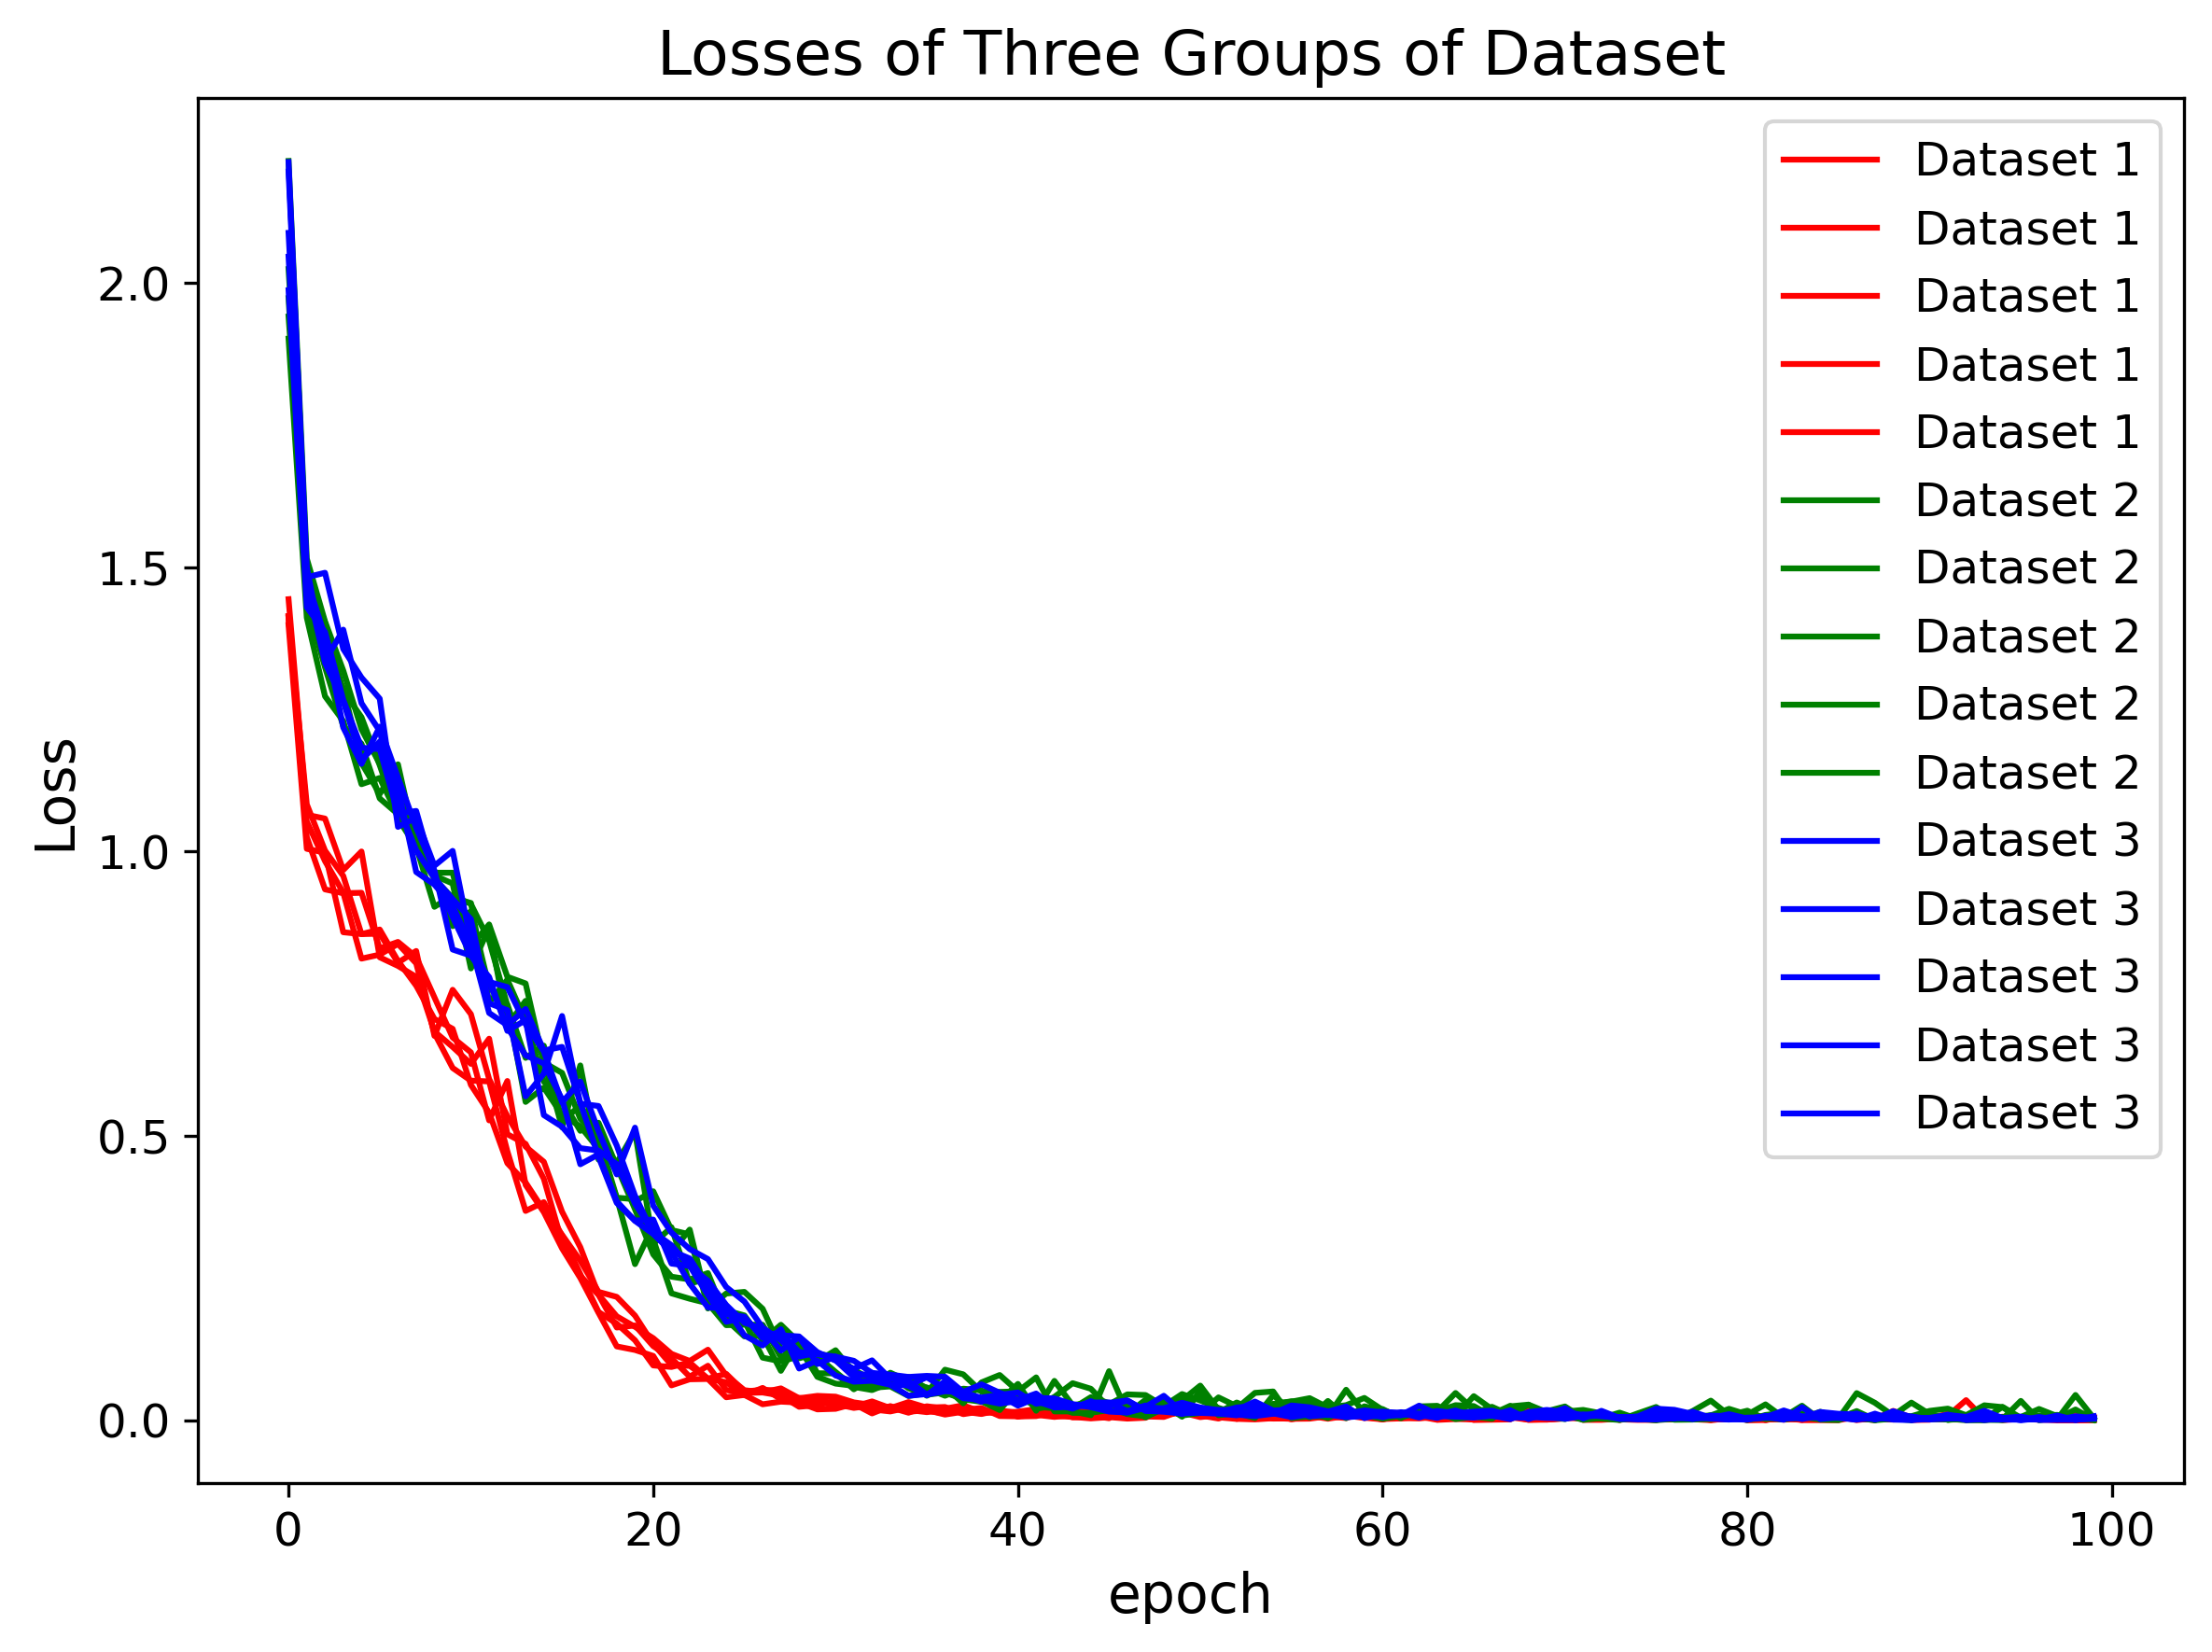

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 存储excel文件所在目录的路径
dir_path = r'D:\BaiduNetdiskDownload\消融实验\lstm_attn\举例数据的元提取\sad'

# 获取目录下的所有文件名
file_names = os.listdir(dir_path)

# 存储所有模型的loss数据的字典
all_losses = {}

# 定义计数器和分组字典
count = 0
group_dict = {}

# 循环遍历每个excel文件，读取其中的loss数据，并计算每个epoch的平均值
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    df = pd.read_excel(file_path)
    
    # 根据文件名确定分组名
    if count % 5 == 0:
        group_name = 'Dataset {}'.format(int(count/5)+1)
        group_dict[group_name] = []
    
    # 获取每个epoch的平均loss
    model_name = file_name.split(".")[0]
    epoch_losses = []
    for epoch in range(0, 100):
        batch_losses = df[df['Step'] == epoch]['Value'].tolist()
        epoch_loss = sum(batch_losses) / len(batch_losses)
        epoch_losses.append(epoch_loss)
    
    # 将loss数据添加到对应分组
    group_dict[group_name].append(epoch_losses)
    
    count += 1

# 对分组字典中的数据进行平均，得到每个模型的loss数据
for group_name, group_losses in group_dict.items():
    epoch_losses_avg = []
    for epoch in range(0, 100):
        epoch_losses_sum = 0
        for model_losses in group_losses:
            epoch_losses_sum += model_losses[epoch]
        epoch_losses_avg.append(epoch_losses_sum/len(group_losses))
    all_losses[group_name] = epoch_losses_avg

# # 绘制变化图像
# fig, ax = plt.subplots()
# colors = ['r', 'g', 'b']
# for i, (group_name, group_losses) in enumerate(group_dict.items()):
#     for j, model_losses in enumerate(group_losses):
#         ax.plot(model_losses, color=colors[i], label='{}'.format(group_name))
# ax.legend()
# ax.set_xlabel('Step')
# ax.set_ylabel('Value')
# plt.show()
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
colors = ['r', 'g', 'b']
for i, (group_name, group_losses) in enumerate(group_dict.items()):
    for j, model_losses in enumerate(group_losses):
        ax.plot(model_losses, color=colors[i], label='{}'.format(group_name))
ax.legend(fontsize=12)
ax.set_xlabel('epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.set_title('Losses of Three Groups of Dataset', fontsize=16)
ax.grid(False)
ax.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.savefig("fig.svg",format="svg")
plt.show()
